Build a regression model utilizing Python's statsmodels package. This model should illustrate the correlation between the quantity of bicycles present in a specific area and the attributes of the Points of Interest (POIs) within the same vicinity."

In [1]:
# First, let's import our libraires:

import requests
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
sns.set(color_codes = True)
import statsmodels.api as sm 

Before building our model, we'll first analyze our datasets using descriptive statistics and Pearson's correlation hypothesis testing. This will help determine if there's a correlation between 'free bikes' (dependent variable) and 'rating' or 'review count' (independent variables), with potential addition of 'latitude' and 'longitude.' Our hypotheses are:

Null Hypothesis (H0): No relationship exists between free bikes and the popularity of nearby POIs.
Alternative Hypothesis (Ha): There is a relationship between free bikes and the popularity of nearby POIs.
This analysis will guide us before proceeding to hypothesis testing. Note that our data is based on a sample from our station population, and the POIs are chosen according to this sample's geolocation.

In [2]:
#  open our datasets starting with our list of stations:        

df_city_bikes_mobi_network_sample = pd.read_csv("df_city_bikes_mobi_network_sample.csv")

df_city_bikes_mobi_network_sample.to_csv("df_city_bikes_mobi_network_sample.csv", index=False)


In [3]:
display(df_city_bikes_mobi_network_sample)


,Unnamed: 0,Id,Uid,Name,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Latitude,Longitude,Timestamp
0,0,7a19c49f486d7c0c02b3685d7b240448,1,10th & Cambie,8,26,1702876024,True,True,49.262487,-123.114397,2023-12-18T05:07:50.365000Z
1,1,bf8408067b0e0c963f3ff526977bcef3,16,Pender & Burrard,9,16,1702875874,True,True,49.287097,-123.118551,2023-12-18T05:07:50.469000Z
2,2,fad9ebcf614dd1a72593a34072ff76f8,39,Helmcken & Burrard,10,4,1702875697,True,True,49.279938,-123.127478,2023-12-18T05:07:49.987000Z
3,3,be14efdc86dedd6a8cd338e78ab4e7c7,60,Bidwell & Burnaby,26,0,0,False,False,49.285260,-123.141809,2023-12-18T05:07:50.342000Z
4,4,93c88a18c673e2c72a6afa93d6b89f18,74,10th & Main,7,11,1702876035,True,True,49.262141,-123.101961,2023-12-18T05:07:50.457000Z
5,5,97b25faf822b93fdbf72da1d594c0288,98,Carrall & Hastings,0,17,1702876009,True,True,49.281170,-123.104419,2023-12-18T05:07:50.568000Z
6,6,826af7eee4ce28b6fa4b4f0211305792,110,5th & Arbutus,11,2,1702875942,True,True,49.267222,-123.153157,2023-12-18T05:07:50.136000Z
7,7,b9ab6ce009eda6006ade1d7568d9db9c,136,David Lam Park,5,13,1702875739,True,True,49.270905,-123.126006,2023-12-18T05:07:49.985000Z
8,8,57e928d8c30fab0ebffb3ede850f89d6,153,Arbutus Greenway & Fir,0,16,1702875745,True,True,49.266774,-123.141135,2023-12-18T05:07:50.564000Z
9,9,b30ed0719dd281867a4d39779c78b58a,180,Columbia & 14th,6,8,1702876022,True,True,49.258902,-123.109596,2023-12-18T05:07:50.326000Z


In [4]:
# And our dataset with only the pois retrieved from FSQ and Yelp:

df_fsq_and_yelp_pois_parsed_and_grouped_by_name = pd.read_csv("df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv")
display(df_fsq_and_yelp_pois_parsed_and_grouped_by_name)

,Name,Distance,Rating,Review Count,Latitude,Longitude
0,33 Acres Brewing Co,674.0,0.0,0.0,49.263877,-123.105307
1,49th Parallel Coffee Roast,877.0,0.0,0.0,49.259164,-123.100851
2,A Bread Affair,735.0,0.0,0.0,49.272480,-123.135889
3,Angus T,716.0,0.0,0.0,49.275871,-123.119875
4,Anh and Chi,750.0,4.0,653.0,49.255019,-123.100904
...,...,...,...,...,...,...
410,Yuji's From Japan,0.0,4.0,53.0,49.268297,-123.186045
411,Zakkushi Dining On Main,0.0,4.0,222.0,49.249101,-123.101546
412,Zakkushi on Denman,0.0,4.0,258.0,49.291080,-123.136430
413,Zarak By Afghan Kitchen,0.0,4.5,86.0,49.266224,-123.100609


In [5]:
# And one more dataset with information joined with citybikes, api and yelp:

df_city_bikes_mobi_network_with_fsq_and_yelp = pd.read_csv("df_city_bikes_mobi_network_with_fsq_and_yelp.csv")
display(df_city_bikes_mobi_network_with_fsq_and_yelp) 

,Unnamed: 0,Id,Uid,Name,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Latitude,Longitude,Timestamp,Rating,Review Count
0,0.0,7a19c49f486d7c0c02b3685d7b240448,1,10th & Cambie,8,26,1.702876e+09,1,True,0.000000,0.000000,2023-12-18T05:07:50.365000Z,0.0,0
1,1.0,bf8408067b0e0c963f3ff526977bcef3,16,Pender & Burrard,9,16,1.702876e+09,1,True,0.000000,0.000000,2023-12-18T05:07:50.469000Z,0.0,0
2,2.0,fad9ebcf614dd1a72593a34072ff76f8,39,Helmcken & Burrard,10,4,1.702876e+09,1,True,0.000000,0.000000,2023-12-18T05:07:49.987000Z,0.0,0
3,3.0,be14efdc86dedd6a8cd338e78ab4e7c7,60,Bidwell & Burnaby,26,0,0.000000e+00,0,False,0.000000,0.000000,2023-12-18T05:07:50.342000Z,0.0,0
4,4.0,93c88a18c673e2c72a6afa93d6b89f18,74,10th & Main,7,11,1.702876e+09,1,True,0.000000,0.000000,2023-12-18T05:07:50.457000Z,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.0,0,0,Yuji's From Japan,0,0,0.000000e+00,0,0,49.268297,-123.186045,0,4.0,53
435,0.0,0,0,Zakkushi Dining On Main,0,0,0.000000e+00,0,0,49.249101,-123.101546,0,4.0,-34
436,0.0,0,0,Zakkushi on Denman,0,0,0.000000e+00,0,0,49.291080,-123.136430,0,4.0,2
437,0.0,0,0,Zarak By Afghan Kitchen,0,0,0.000000e+00,0,0,49.266224,-123.100609,0,4.5,86


 Formulating Statistical Analysis and Hypothesis Testing

In [6]:
# Let's proceed with the summary of statistics of our merged (and last) dataset (df_city_bikes_mobi_network_with_fsq_and_yelp):

df_city_bikes_mobi_network_with_fsq_and_yelp.describe()

,Unnamed: 0,Uid,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Latitude,Longitude,Rating,Review Count
count,439.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.683371,0.412301,0.535308,0.544419,9.309572e+07,0.054670,46.578064,-116.391913,3.023918,8.708428
std,3.274012,16.256672,2.657462,2.819892,3.875639e+08,0.227594,11.213946,28.022049,1.799923,63.391094
min,0.000000,-120.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-123.211153,0.000000,-128.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,49.263046,-123.137006,0.000000,-11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,49.268297,-123.116857,4.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,49.282350,-123.100673,4.000000,51.000000
max,24.000000,124.000000,26.000000,26.000000,1.702876e+09,1.000000,49.301704,0.000000,5.000000,126.000000


There are no more non-null or missing values in the columns (information given by the count parameter);
The average of the variables empty slots (0.535308), free bikes (0.544419), renting bikes (0.054670) , and the last three are closer to 0. This might indicate that they have a low average and also point out that there are very few bikes available for rent (free bikes) or being rented (renting bikes) at the bike-sharing stations;
The standard deviation of the empty slots (2.657462) is lower than the free bikes (2.819892), and the std of the review count (63.391094) is bigger than the rating (1.799923). This might mean that the values for the empty slots are more spread out than the ones from the free bikes, and the ones from the review count are also more spread out than the ones from the rating. So the variables free bikes and rating might be a little bit more closer to the mean;

In [7]:
# Checking the stations uid number that might be outliers:

free_bikes_uid_filtered_by_available_bikes = df_city_bikes_mobi_network_sample["Free Bikes"] > 10
filtered_df_by_free_bikes_pot_outliers = df_city_bikes_mobi_network_sample[free_bikes_uid_filtered_by_available_bikes]
display(filtered_df_by_free_bikes_pot_outliers)

,Unnamed: 0,Id,Uid,Name,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Latitude,Longitude,Timestamp
0,0,7a19c49f486d7c0c02b3685d7b240448,1,10th & Cambie,8,26,1702876024,True,True,49.262487,-123.114397,2023-12-18T05:07:50.365000Z
1,1,bf8408067b0e0c963f3ff526977bcef3,16,Pender & Burrard,9,16,1702875874,True,True,49.287097,-123.118551,2023-12-18T05:07:50.469000Z
4,4,93c88a18c673e2c72a6afa93d6b89f18,74,10th & Main,7,11,1702876035,True,True,49.262141,-123.101961,2023-12-18T05:07:50.457000Z
5,5,97b25faf822b93fdbf72da1d594c0288,98,Carrall & Hastings,0,17,1702876009,True,True,49.281170,-123.104419,2023-12-18T05:07:50.568000Z
7,7,b9ab6ce009eda6006ade1d7568d9db9c,136,David Lam Park,5,13,1702875739,True,True,49.270905,-123.126006,2023-12-18T05:07:49.985000Z
8,8,57e928d8c30fab0ebffb3ede850f89d6,153,Arbutus Greenway & Fir,0,16,1702875745,True,True,49.266774,-123.141135,2023-12-18T05:07:50.564000Z
17,17,ce5dccf5a0f190bb4567a2fd93e7971e,122,Haro & Denman,0,19,1702875913,True,True,49.290587,-123.136250,2023-12-18T05:07:50.048000Z
18,18,58a026f0c506caec20697a4f90538450,225,McLean & Pender,5,11,1702875670,True,True,49.280427,-123.074082,2023-12-18T05:07:50.533000Z
19,19,9763838317308a4766b83696986a157b,415,Dunbar & Broadway,15,11,1702875843,True,True,49.264579,-123.183730,2023-12-18T05:07:50.548000Z
21,21,f5e8fa1fc4252bda2f93dd27ed2d603f,313,Nelson & Denman,1,16,1702875889,True,True,49.289071,-123.138407,2023-12-18T05:07:50.594000Z


c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


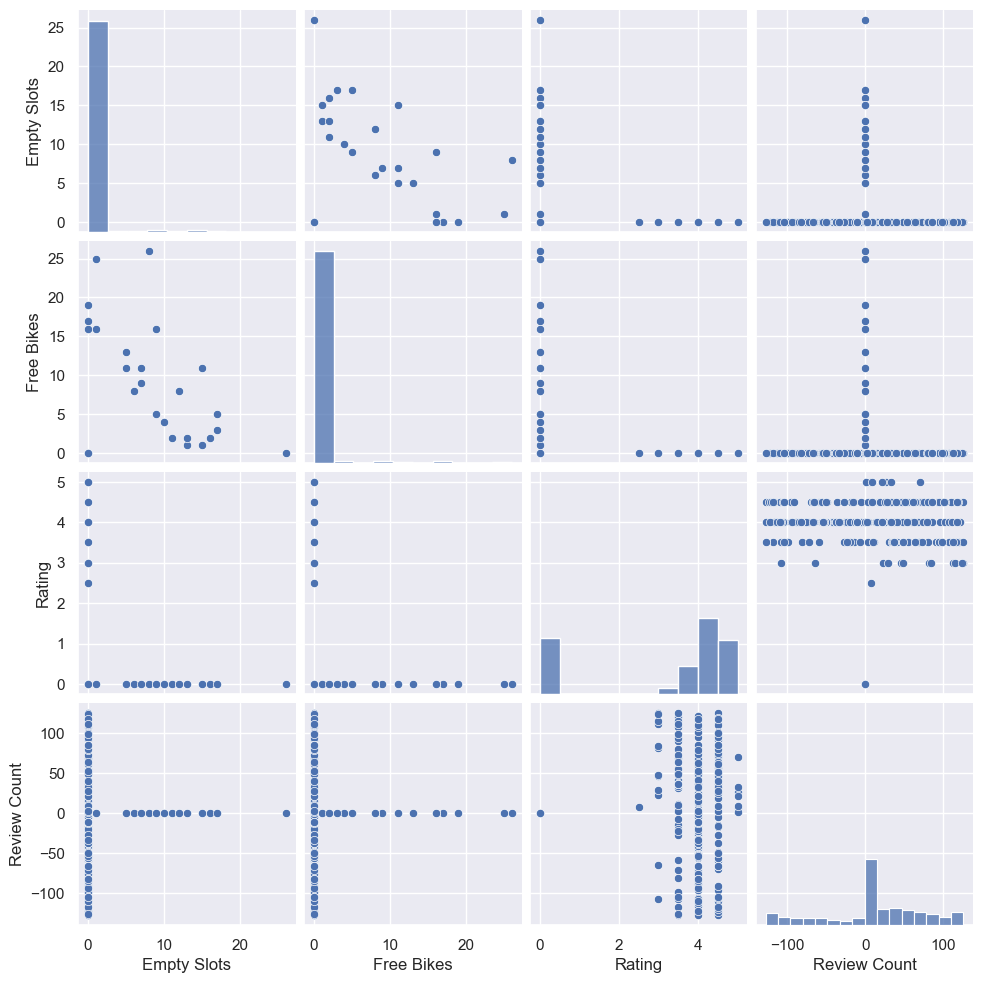

In [8]:
# Now, let's try to explore more the relationship between these variables with the help of a pairplot:

import seaborn as sns

sns.pairplot(df_city_bikes_mobi_network_with_fsq_and_yelp[["Empty Slots", "Free Bikes", "Rating", "Review Count"]])


Here's an analysis of the pair plot:

Empty Slots vs. Other Variables:

With Free Bikes: There's no clear linear relationship. Some points suggest that when there are more free bikes, there are fewer empty slots, but the relationship is not strong.
With Rating: There's a vertical line of points at a single rating value, which could suggest that most of the data has the same rating, or it could be an outlier or default value.
With Review Count: There's a concentration of points near zero review counts, with some outliers showing negative review counts, which is unusual and might indicate errors in the data.
Free Bikes vs. Other Variables:

With Rating: Similar to empty slots, there's a vertical line suggesting a single common value or an outlier in the ratings.
With Review Count: The relationship is unclear, but there's again a concentration of data near zero review count with some negative values.
Rating vs. Other Variables:

With Review Count: The rating seems to be mostly a single value with no clear trend or relationship with review count.
Review Count:

The histogram for the review count shows an unusual distribution with a spike near zero and some negative values. Negative review counts are not typical and could indicate data entry issues.
Distributions (Diagonal Histograms):

Empty Slots: Most of the data is concentrated in the lower end of the scale with a long tail to the right.
Free Bikes: Shows a somewhat similar distribution to empty slots, which is reasonable because they are related quantities.
Rating: The distribution is not visible due to the concentration of data points at a single value.
Review Count: Most reviews are concentrated near zero, with very few higher counts, indicating that most items have few reviews.
In summary, the pair plot shows that there may be some errors or peculiarities in the data, particularly with the rating and review count variables. The distributions of empty slots and free bikes are skewed towards lower values, which is typical for such counts. There is no clear linear relationship between the pairs of variables plotted, which suggests that any relationships that may exist are either non-linear or not present among these particular variables

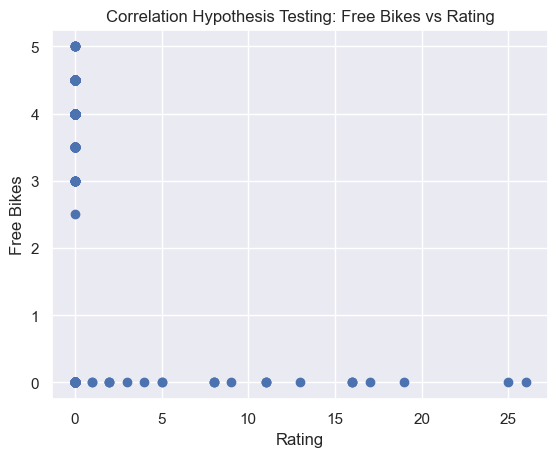

In [9]:
# The variables to be analyzed are free bikes x rating:
free_bikes = df_city_bikes_mobi_network_with_fsq_and_yelp["Free Bikes"]
rating = df_city_bikes_mobi_network_with_fsq_and_yelp["Rating"]

# Then, let's do our  scatter plot:
plt.scatter(free_bikes, rating)

# Some labels and title to add on it:
plt.xlabel('Rating')
plt.ylabel('Free Bikes')
plt.title('Correlation Hypothesis Testing: Free Bikes vs Rating')

# Let's show the plot:
plt.show()

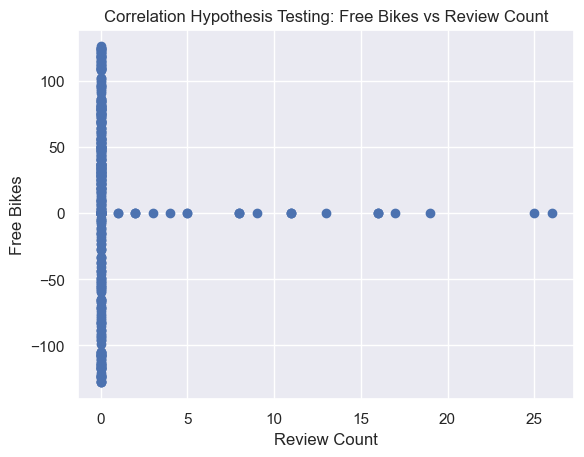

In [10]:
# The other variables to be analyzed are free bikes x review count:
free_bikes = df_city_bikes_mobi_network_with_fsq_and_yelp["Free Bikes"]
review_count = df_city_bikes_mobi_network_with_fsq_and_yelp["Review Count"]

# Then, let's do our  scatter plot:
plt.scatter(free_bikes, review_count)

# Some labels and title to add on it:
plt.xlabel('Review Count')
plt.ylabel('Free Bikes')
plt.title('Correlation Hypothesis Testing: Free Bikes vs Review Count')

# Let's show the plot:
plt.show()

Let's begin our analysis of the graphs by examining the significance of the variables rating and review count. These two factors have the potential to impact the popularity of a Point of Interest (POI) and the level of interest users have in visiting a particular location.

Furthermore, it's important to note that the variable review count has been transformed into a discrete variable as part of our data cleaning process. Initially, it was in the float64 data type but was converted to integer8. This conversion not only optimizes memory usage but also enhances the precision of our analysis. As a discrete variable, review count can only assume integer values, which aligns with its nature as a count of user reviews.

In contrast, rating is treated as an interval variable, and we have refrained from converting it into an integer type. This decision is deliberate because it preserves the decimal precision inherent in ratings. In the realm of business and customer feedback, every decimal point holds significance. By maintaining rating as an interval variable, we acknowledge its ability to represent subtle distinctions in the quality of the rated entity.

It's worth noting that this choice introduces a level of imprecision into our analysis, as rating is not constrained to discrete categories like "Excellent," "Very Good," or "Good." Instead, it encompasses a continuous range of values. This aspect should be considered when assessing correlations and its potential impact on our modeling efforts.

In summary, our analysis considers rating as an interval variable and review count as a discrete variable, recognizing the trade-offs and implications associated with these data type choices. Additionally, we acknowledge that a categorical transformation of rating could yield different insights, but for now, we maintain its interval nature

In [11]:
# Now, let's consider calculating the mean of our stations by some variables to see if those variables could be used in our model:

# Let's get some mean and values to analyze from our city bikes stations and pois:
mean_st_free_bikes, mean_st_empty_slots = df_city_bikes_mobi_network_sample[['Free Bikes', 'Empty Slots']].mean()
mean_pois_review, mean_pois_rating = df_fsq_and_yelp_pois_parsed_and_grouped_by_name[['Review Count', 'Rating']].mean()

# And print the means:
print("The mean of free bikes is:", mean_st_free_bikes)
print("The mean of empty slots is:", mean_st_empty_slots)
print("The mean of pois rating is:", mean_pois_review)
print("The mean of pois review is:", mean_pois_rating)


The mean of free bikes is: 9.56
The mean of empty slots is: 9.4
The mean of pois rating is: 205.99277108433736
The mean of pois review is: 3.1987951807228914


In [12]:
# Let's check if there are free bikes and empty slots more spread out from the mean:

free_bikes_uid_filtered_by_available_bikes_and_empty_slots = (df_city_bikes_mobi_network_sample['Free Bikes'] >= 4) & (df_city_bikes_mobi_network_sample['Empty Slots'] >= 11)
selected_stations_rows = free_bikes_uid_filtered_by_available_bikes_and_empty_slots
display(selected_stations_rows)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22     True
23    False
24     True
dtype: bool

This confirms that there are 4 outliers in our sample of stations 

In [13]:
# Let's check if there are pois with a higher rating and review count:

mean_of_pois_h_rating_and_review = (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Rating'] > 3.25) & (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Review Count'] > 3)
selected_pois_rows = df_fsq_and_yelp_pois_parsed_and_grouped_by_name[mean_of_pois_h_rating_and_review]
df_of_pois_high_rating_and_review = selected_pois_rows
display(df_of_pois_high_rating_and_review)
df_of_pois_high_rating_and_review.count()

,Name,Distance,Rating,Review Count,Latitude,Longitude
4,Anh and Chi,750.0,4.0,653.0,49.255019,-123.100904
5,AnnaLena,602.0,4.5,353.0,49.270791,-123.146937
7,Au Comptoir,301.0,4.0,212.0,49.268082,-123.157004
9,Beaucoup Bakery & Cafe,49.0,4.0,330.0,49.266477,-123.140728
15,Burgoo Bistro,243.0,4.0,174.0,49.263678,-123.207137
...,...,...,...,...,...,...
410,Yuji's From Japan,0.0,4.0,53.0,49.268297,-123.186045
411,Zakkushi Dining On Main,0.0,4.0,222.0,49.249101,-123.101546
412,Zakkushi on Denman,0.0,4.0,258.0,49.291080,-123.136430
413,Zarak By Afghan Kitchen,0.0,4.5,86.0,49.266224,-123.100609


Name            310
Distance        310
Rating          310
Review Count    310
Latitude        310
Longitude       310
dtype: int64

In [14]:
# Let's check if there are pois with a higher rating and review count:

mean_of_pois_h_rating_and_review = (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Rating'] > 3.25) & (df_fsq_and_yelp_pois_parsed_and_grouped_by_name['Review Count'] > 3)
selected_pois_rows = df_fsq_and_yelp_pois_parsed_and_grouped_by_name[mean_of_pois_h_rating_and_review]
df_of_pois_high_rating_and_review = selected_pois_rows
display(df_of_pois_high_rating_and_review)
df_of_pois_high_rating_and_review.count()

,Name,Distance,Rating,Review Count,Latitude,Longitude
4,Anh and Chi,750.0,4.0,653.0,49.255019,-123.100904
5,AnnaLena,602.0,4.5,353.0,49.270791,-123.146937
7,Au Comptoir,301.0,4.0,212.0,49.268082,-123.157004
9,Beaucoup Bakery & Cafe,49.0,4.0,330.0,49.266477,-123.140728
15,Burgoo Bistro,243.0,4.0,174.0,49.263678,-123.207137
...,...,...,...,...,...,...
410,Yuji's From Japan,0.0,4.0,53.0,49.268297,-123.186045
411,Zakkushi Dining On Main,0.0,4.0,222.0,49.249101,-123.101546
412,Zakkushi on Denman,0.0,4.0,258.0,49.291080,-123.136430
413,Zarak By Afghan Kitchen,0.0,4.5,86.0,49.266224,-123.100609


Name            310
Distance        310
Rating          310
Review Count    310
Latitude        310
Longitude       310
dtype: int64

So there are about  310 POIs with a rating and review count .

 Building Regression Models and Evaluating the Models Fitting: *What is the output of the statistical analysis?*

In [15]:
# Now, let's go to create our multiple linear regression model.
# For this model, the * free bikes* is going to be our y-variable (dependent variable).
# First, let's start with assessing our 2 independent variables that are "rating" and "review count":

x = df_city_bikes_mobi_network_with_fsq_and_yelp[["Rating", "Review Count"]]
y = df_city_bikes_mobi_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     25.78
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           2.62e-11
Time:                        00:26:43   Log-Likelihood:                -1053.0
No. Observations:                 439   AIC:                             2112.
Df Residuals:                     436   BIC:                             2124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0856      0.250      8.353      0.000       1.595       2.576
Rating          -0.5086      0.071     -7.157      0.000      -0.648      -0.369
Review Count    -0.0004      0.002     -0.185      0.854      -0.004       0.004
==============================================================================
Omnibus:                      508.941   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27471.368
Skew:                           5.495   Prob(JB):                         0.00
Kurtosis:                      40.163   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the analysis of the multiple linear regression model above, it looks like that the adj r-squared of 0.106 is low. This means this might not be a good model to analyze the correlation between our 3 variables: free bikes with rating and review count. So this regression model might explain a very small portion of the variation in the response variable of *free bikes*. So, this regression may not be a good fit for the data and not useful for making predictions. 

At the same time, let's analyze the *p-values* since the adjusted r-square doesn't give everything. 

The p-value for each variable tests the null hypothesis that there is no correlation (the status-quo hypothesis). A small p-value such as 0.000 (typically less than 0.05) indicates strong evidence against the null hypothesis, which suggests that the corresponding predictor variable, in this case, the *rating* variable might have a significant effect on the response variable (the *free bikes*). On the other hand, the review count variable has a p-value of 0.854, which is greater than 0.05, indicating that there is not enough evidence to reject the null hypothesis according to this parameter; and the *review count* variable may not have a significant effect on the dependent variable *free bikes*. 

In regards of the *skewness*, the value of 5.495 indicated that the distribution of the data is more skewed to the right, so we have more data points in the right side (positive skew). This can indicate that the distribution is not normal and might be influenced by outliers. As we have seen, we found at least 4 outliers in our sample in the analysis above. Also, it is noted that the *kurtosis* value of 40.163 indicates that the distribution of the data is very peaked. This suggests, again, that there are more outliers to be seen of.

Bringing out the *coefficient*, it is noted that for the rating variable it is -0.5086. This means that while the rating increases, the free bikes decrease as we are hypothesizing in our alternative hypothesis. Similarly, this indicates the direction of the relationship between the independent (rating) and dependent variable (free bikes). A negative coefficient for the rating variable suggests that there is a negative relationship between the rating and the response variable, which means that as the rating increases, the response variable decreases (the bikes available to be rented). Also, in this case, the coefficient for the review count variable is -0.0004. This means that for a one increase in the review count, the response variable is expected to decrease by 0.0000 units. And, by one increase in the rating done by the users of POIs, the response variable (free bikes) is expected to decrease by -0.0004. 


c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


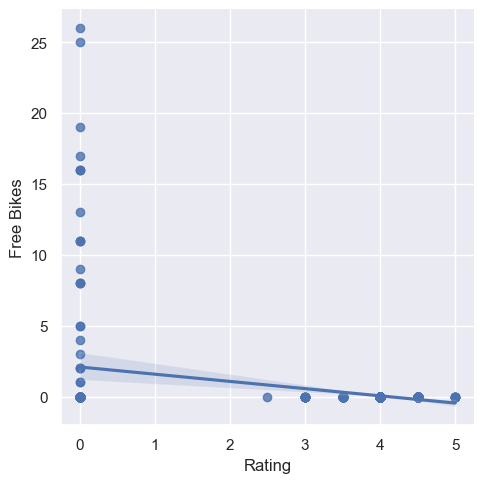

In [16]:
# Let's now visualize our linear regression model using the 'lmplot' function from Seaborn:

sns.lmplot(x='Rating', y='Free Bikes', data=df_city_bikes_mobi_network_with_fsq_and_yelp)

plt.show()

c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


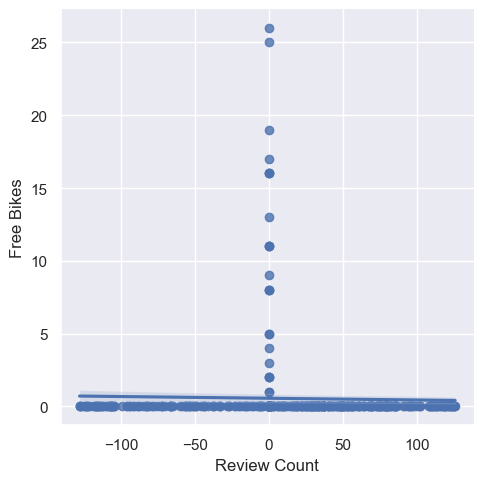

In [17]:
# And let's add to this visualization our review count variable:

sns.lmplot(x='Review Count', y='Free Bikes', data=df_city_bikes_mobi_network_with_fsq_and_yelp)

plt.show()

c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


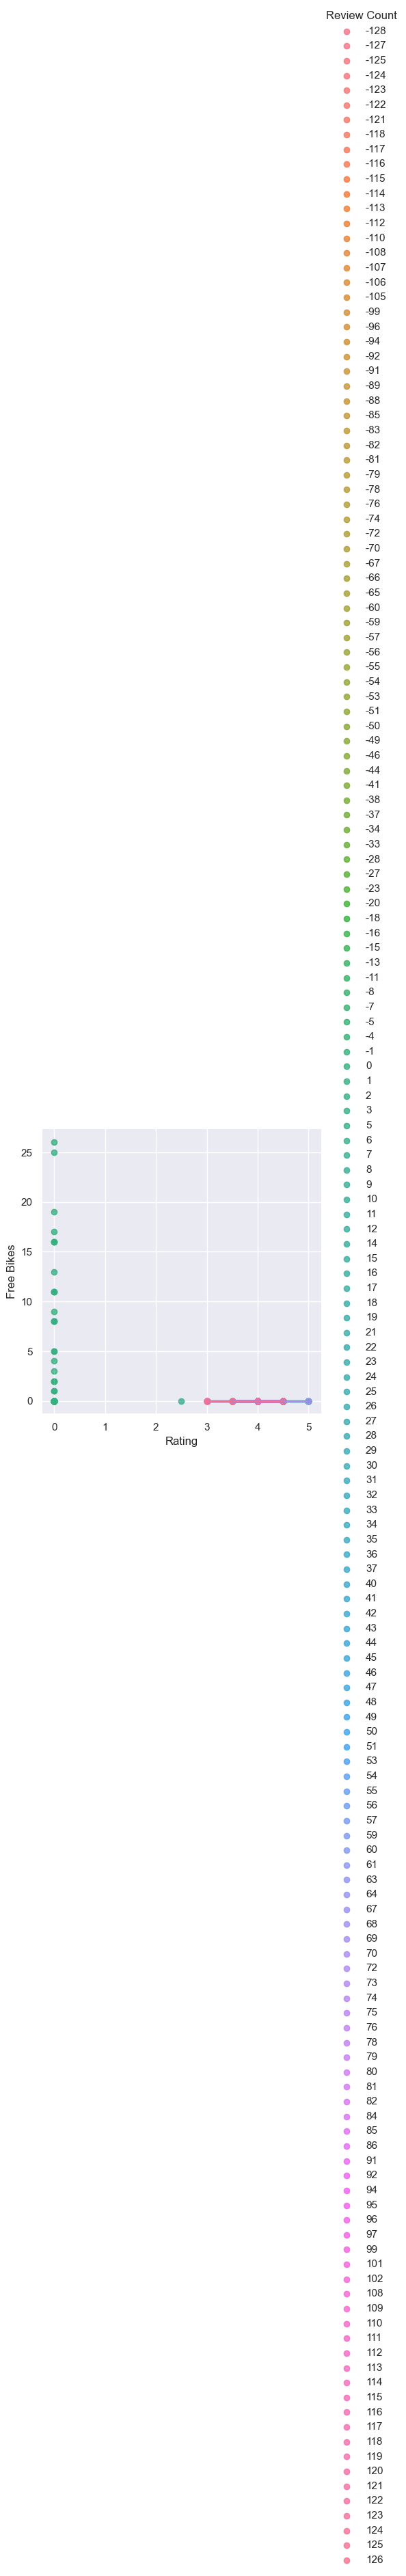

In [18]:
# Let's now visualize our linear regression model using the 3 variables above:

sns.lmplot(x='Rating', y='Free Bikes', hue='Review Count', data=df_city_bikes_mobi_network_with_fsq_and_yelp)

plt.show()

In [19]:
# Now, let's go to create our multiple linear regression model considering now another variable that is empty slots:

x = df_city_bikes_mobi_network_with_fsq_and_yelp[["Rating", "Review Count", "Empty Slots"]]
y = df_city_bikes_mobi_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     34.04
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           8.81e-20
Time:                        00:47:38   Log-Likelihood:                -1031.2
No. Observations:                 439   AIC:                             2070.
Df Residuals:                     435   BIC:                             2087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4136      0.258      5.480      0.000       0.907       1.921
Rating          -0.3447      0.072     -4.791      0.000      -0.486      -0.203
Review Count    -0.0003      0.002     -0.131      0.896      -0.004       0.004
Empty Slots      0.3277      0.049      6.732      0.000       0.232       0.423
==============================================================================
Omnibus:                      523.291   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34639.834
Skew:                           5.667   Prob(JB):                         0.00
Kurtosis:                      45.015   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


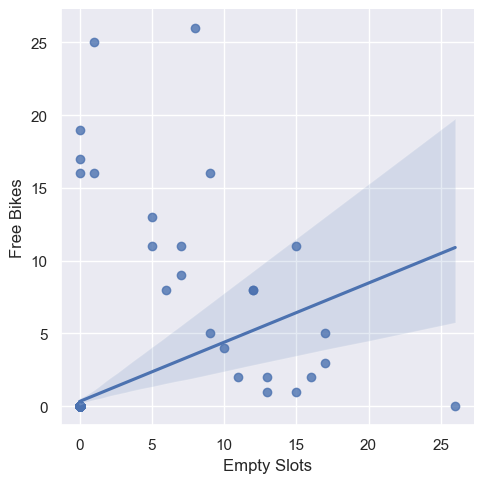

In [20]:
# Let's now visualize our linear regression model using first "empty slots" and "free bikes" variables above:

sns.lmplot(x='Empty Slots', y='Free Bikes', data=df_city_bikes_mobi_network_with_fsq_and_yelp)

plt.show()

From this graph, we can see there is a positive correlation between the amount of bikes available to be rent and the amount of slots empty to be used to put the bikes back. This makes sense as the stations should accomodate a specific number of bikes to be rented and to be put back. Therefore, a station that has more empty slots will probably have more bikes available. This suggests that the fit of our model evaluation is getting more accurate. 


c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


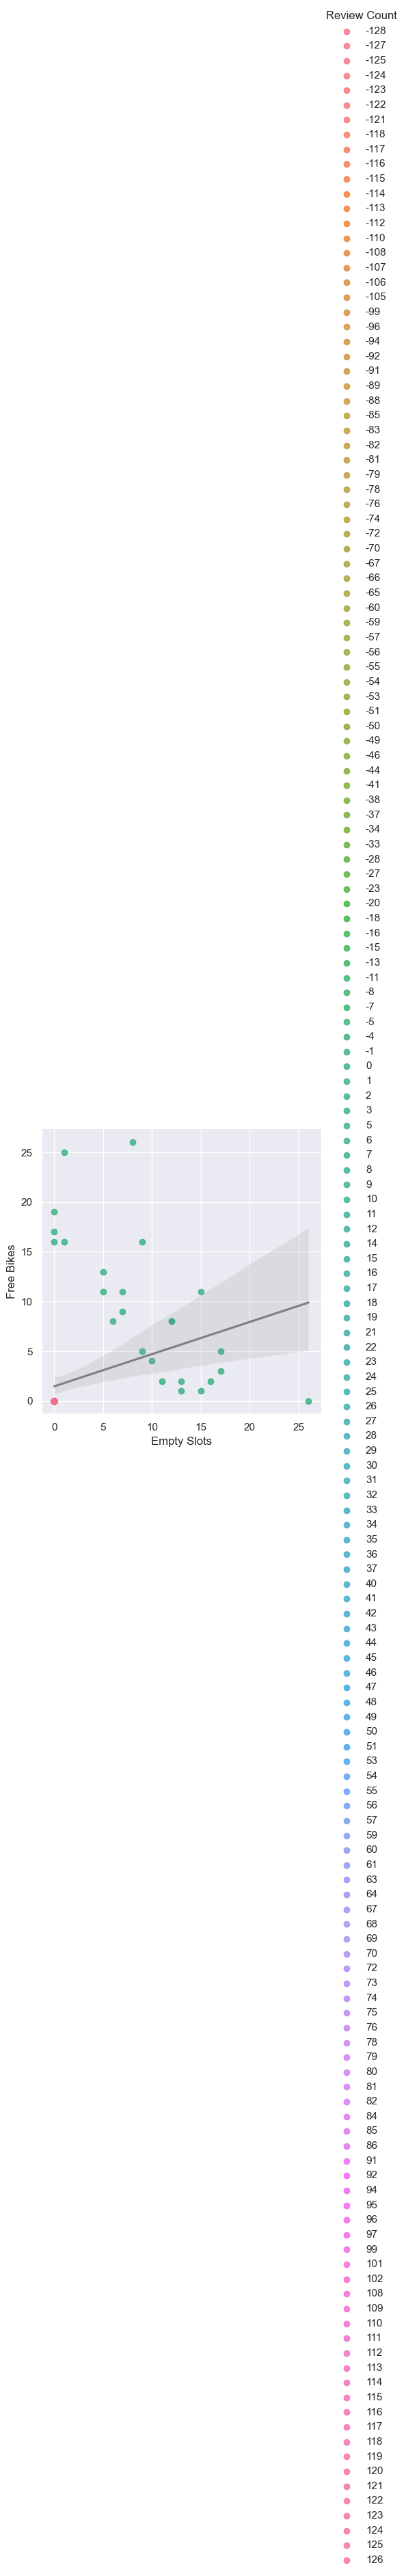

In [21]:
# Let's now visualize our linear regression model using the 3 variables above:

sns.lmplot(x='Empty Slots', y='Free Bikes', hue='Review Count', data=df_city_bikes_mobi_network_with_fsq_and_yelp, 
           line_kws={'color':'grey'})
plt.show()


c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


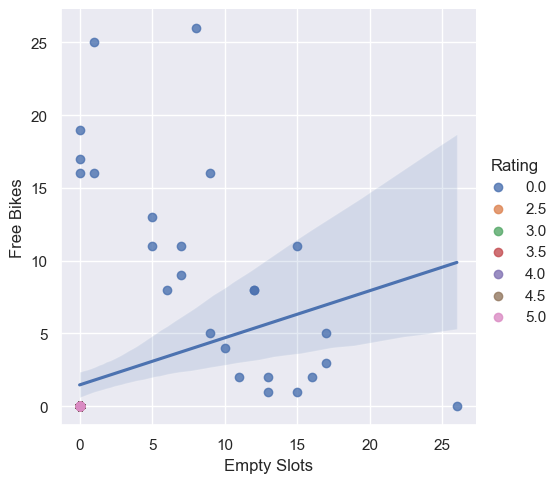

In [22]:
# Let's now visualize our linear regression model using the 3 variables above:

sns.lmplot(x='Empty Slots', y='Free Bikes', hue='Rating', data=df_city_bikes_mobi_network_with_fsq_and_yelp)

plt.show()

It is clear from this graph that when *rating* is added as a variable in the equation between *free bikes* and *empty slots*, we can see that the higher the rating of a POI is the number of free bikes available at the station closer by tends to be zero.

In [23]:
# Let's try to do our multiple linear regression model considering one more variable that is "renting bikes":

x = df_city_bikes_mobi_network_with_fsq_and_yelp[["Rating", "Review Count", "Empty Slots", "Renting Bikes"]]
y = df_city_bikes_mobi_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     317.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.83e-127
Time:                        00:50:22   Log-Likelihood:                -777.18
No. Observations:                 439   AIC:                             1564.
Df Residuals:                     434   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1432      0.151      0.951      0.342      -0.153       0.439
Rating           -0.0349      0.042     -0.839      0.402      -0.117       0.047
Review Count  -2.558e-05      0.001     -0.024      0.981      -0.002       0.002
Empty Slots      -0.4990      0.038    -13.023      0.000      -0.574      -0.424
Renting Bikes    14.1602      0.460     30.771      0.000      13.256      15.065
==============================================================================
Omnibus:                      510.987   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69482.192
Skew:                           5.073   Prob(JB):                         0.00
Kurtosis:                      63.792   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\Users\minab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


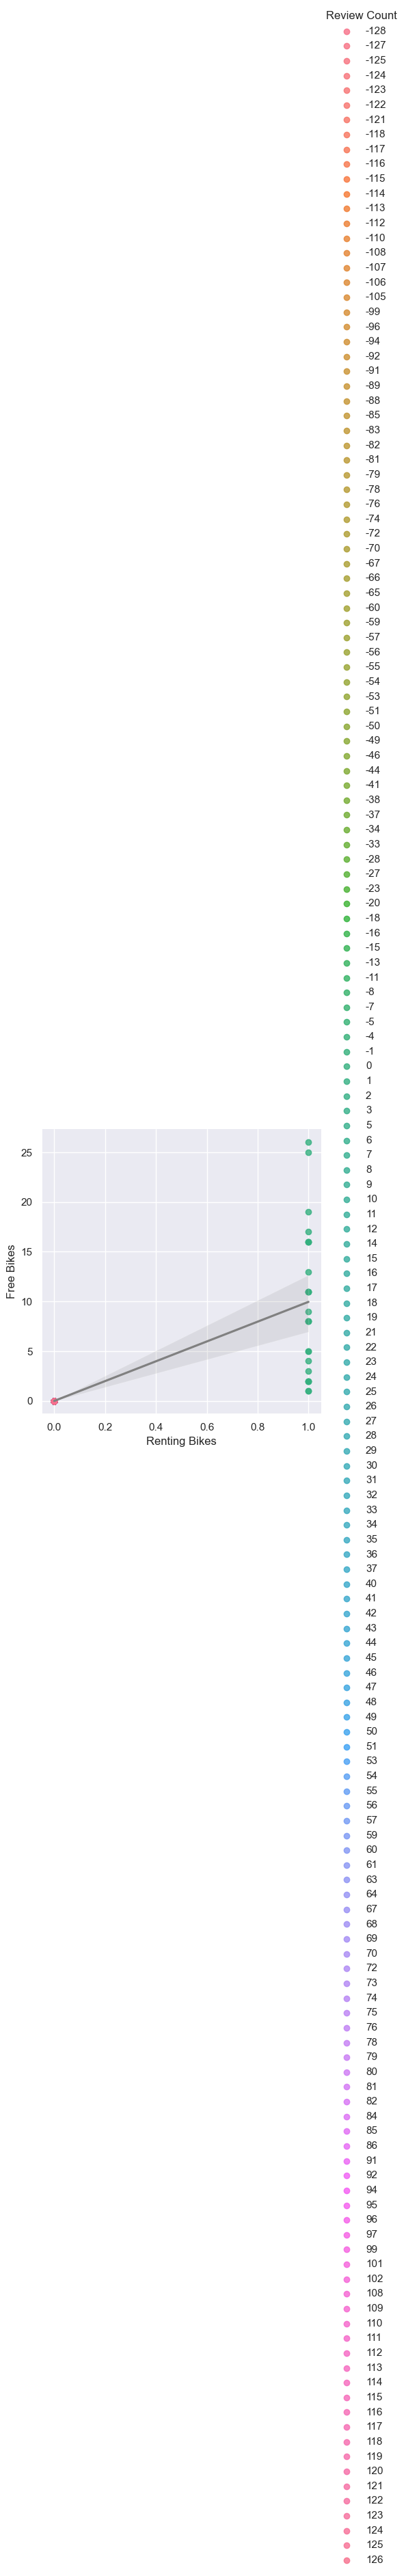

In [24]:
# Let's now visualize our linear regression model using some of the 3 variables above:

sns.lmplot(x='Renting Bikes', y='Free Bikes', hue='Review Count', data=df_city_bikes_mobi_network_with_fsq_and_yelp, 
           line_kws={'color':'grey'})
plt.show()


We can see with this model that our adjusted r-squared increased significantly and is 0.625. It is also very similar to the value of our r-square which is 0.743. As we know, r-squared is the measurement of how much of the dependent variable is explained by changes in our independent variables. So a higher adjusted r-squared means that our model fits the data well and we are focusing at this parameter because of the type of linear regression we are using (multivariate). 

So, for multivariate linear regression, it is important to look at the adjusted r-squared instead of the only r-squared. The adjusted R-squared adjusts the R-squared formula based on the number of variables, therefore a lower adjusted score may indicate that some variables are not contributing to your model fit and evaluation.

On the other hand, with this model the p-value of the *rating* and *review count* is higher so it might not be significant to our variable *free bikes*. The p-value column in the model output shows the effect of each variable on the outcome. If a variable has a p-value greater than the threshold value of 0.05, this may indicate that the variable should be removed from the model in order to get a better model fit. So at this point we must evaluate our model to see which variable stays or not.

At the same time, the skew remains to the right side and positive, and the kurtosis (peak) keeps high. And, besides that, our Prob (F-statistic) is 1.83e-127 which give us some indication that our alternative hypothesis might be accepted as it is a very small number.

In summary, the Prob (F-statistic) value of 1.83e-127 suggests that the general regression model that we built is significant and, thus, there is evidence that there is a relationship between the independent and dependent variables in place. Finally, let's add our last variables to see if they are significant to our model: *latitude* and *longitude*.


In [25]:
# Finally let's try to do our multiple linear regression model considering two more variables that are "latitude" and "longitude":

x = df_city_bikes_mobi_network_with_fsq_and_yelp[["Rating", "Review Count", "Empty Slots", "Renting Bikes", "Latitude", "Longitude"]]
y = df_city_bikes_mobi_network_with_fsq_and_yelp["Free Bikes"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Free Bikes   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     247.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          2.03e-136
Time:                        00:54:27   Log-Likelihood:                -750.30
No. Observations:                 439   AIC:                             1515.
Df Residuals:                     432   BIC:                             1543.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.8813      1.173      7.570      0.000       6.575      11.187
Rating           -0.0243      0.039     -0.618      0.537      -0.102       0.053
Review Count  -1.603e-05      0.001     -0.016      0.987      -0.002       0.002
Empty Slots      -0.6846      0.044    -15.636      0.000      -0.771      -0.599
Renting Bikes     7.4050      0.999      7.409      0.000       5.441       9.369
Latitude         -0.0092      3.479     -0.003      0.998      -6.847       6.829
Longitude         0.0677      1.392      0.049      0.961      -2.669       2.804
==============================================================================
Omnibus:                      482.020   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59149.642
Skew:                           4.596   Prob(JB):                         0.00
Kurtosis:                      59.118   Cond. No.                     7.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Whith this last model, our Prob (F-statistic) decreased a little bit (2.03e-136). 

However, as some of our p-values increased a lot with the exception of *empty slots*, this might not be a good model to be used in our analysis.

# Stretch

How can you turn the regression model into a classification model?